# ITAcademy - Data Science amb Python
# Sprint 4, Tasca 1: Visualització gràfica d'un dataset

## Introducció

Aquest Dataset està compost per les següents variables:

1. **Year**: 2008
2. **Month**: 1-12
3. **DayofMonth**: 1-31
4. **DayOfWeek**: 1 (Dilluns) - 7 (Diumenge)
5. **DepTime**: Hora de sortida real (local, hhmm)
6. **CRSDepTime**: Hora de sortida programada (local, hhmm)
7. **ArrTime**: Hora d'arribada real (local, hhmm)
8. **CRSArrTime**: Hora d'arribada programada (local, hhmm)
9. **UniqueCarrier**:  Codi d'operador únic
10. **FlightNum**: Número de vol
11. **TailNum**: Matrícula de l'avió
12. **ActualElapsedTime**: Temps transcorregut real (en minuts)
13. **CRSElapsedTime**: Temps transcorregut programat (en minuts)
14. **AirTime**: Temps en l'aire (en minuts)
15. **ArrDelay**: Retràs en l'arribada (en minuts; \[*1]
16. **DepDelay**: Retràs en la sortida (en minuts)
17. **Origin**: Codi IATA de l'aeroport d'origen
18. **Dest**: Codi IATA de l'aeroport de destí
19. **Distance**: Distància (en milles)
20. **TaxiIn**: Rodatge a pista (en minuts)
21. **TaxiOut**: Rodatge a porta (en minuts)
22. **Cancelled**: Si el vol ha sigut o no cancel·lat
23. **CancellationCode**: Codi amb el motiu de la cancel·lació (A = operadora, B = clima, C = NAS, D = seguretat)
24. **Diverted**: Desviat (1 = si, 0 = no)
25. **CarrierDelay**: Retràs degut a l'operador (en minuts) \[*2]
26. **WeatherDelay**: Retràs degut al clima (en minuts): \[*3]
27. **NASDelay**: Retràs degut al NAS (en minuts) \[*4]
28. **SecurityDelay** Retràs degut a Seguretat (en minuts) \[*5]
29. **LateAircraftDelay** Retràs acumulat de l'avió (en minuts) \[*6]


\[*1] "A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS)")

\[*2] "Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays."

\[*3] "Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival."

\[*4] "Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc."

\[*5] "Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas."

\[*6] "Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv("DelayedFlights.csv", index_col=0)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


Seleccionem del DataFrame original les següents columnes d'interés:
- Month
- DayOfMonth
- DayOfWeek
- FlightNum
- DepTime
- CRSDepTime 
- ArrTime 
- CRSArrTime
- UniqueCarrier
- ActualElapsedTime
- CRSElapsedTime
- AirTime
- ArrDelay
- DepDelay
- Origin
- Dest
- Distance

In [3]:
df = df[["Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "UniqueCarrier", "ActualElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest", "Distance"]]
df.dropna(axis=0, inplace=True)

In [4]:
# Import airlines.csv to obtain carrier names
carriers = pd.read_csv("airlines.csv") 
carriers = carriers.rename(columns={"Code":"UniqueCarrier", "Description": "CarrierName"})
carriers.head()

,UniqueCarrier,CarrierName
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [5]:
#Convert distances from miles to km
df = df.assign(Distance = lambda x: x.Distance * 1.60934)

#Convert from minutes to hours
df = df.assign(AirTime = lambda x: x.AirTime / 60)

# Create a column Delayed to know if the flight is delayed or not
df = df.assign(Delayed = lambda x: (x.ArrDelay >= 15) | (x.DepDelay >= 15))

# Create a new column with the total delay
df.insert((df.columns.get_loc("DepDelay")+1), column='TotalDelay', value=df["ArrDelay"] + df["DepDelay"]) 

# Merge carriers with df
df = pd.merge(df, carriers, how="left", on="UniqueCarrier")
# And move the colum CarrierName next to UniqueCarrier
mid = df["CarrierName"]
df.drop(labels=["CarrierName"], axis=1, inplace=True)
df.insert((df.columns.get_loc("UniqueCarrier")+1), column='CarrierName', value=mid)


In [6]:
# Move df["CarrierName"] next to df["UniqueCarrier"]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,CarrierName,ActualElapsedTime,AirTime,ArrDelay,DepDelay,TotalDelay,Origin,Dest,Distance,Delayed
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,Southwest Airlines Co.,128.00,1.93,-14.00,8.00,-6.00,IAD,TPA,"1,303.57",False
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,Southwest Airlines Co.,128.00,1.88,2.00,19.00,21.00,IAD,TPA,"1,303.57",True
2,2008,1,3,4,628.00,620,804.00,750,WN,Southwest Airlines Co.,96.00,1.27,14.00,8.00,22.00,IND,BWI,828.81,False
3,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,Southwest Airlines Co.,90.00,1.28,34.00,34.00,68.00,IND,BWI,828.81,True
4,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,Southwest Airlines Co.,101.00,1.45,11.00,25.00,36.00,IND,JAX,"1,107.23",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,2008,12,13,6,"1,250.00",1220,"1,617.00",1552,DL,Delta Air Lines Inc.,147.00,2.00,25.00,30.00,55.00,MSP,ATL,"1,458.06",True
1928367,2008,12,13,6,657.00,600,904.00,749,DL,Delta Air Lines Inc.,127.00,1.30,75.00,57.00,132.00,RIC,ATL,774.09,True
1928368,2008,12,13,6,"1,007.00",847,"1,149.00",1010,DL,Delta Air Lines Inc.,162.00,2.03,99.00,80.00,179.00,ATL,IAH,"1,108.84",True
1928369,2008,12,13,6,"1,251.00",1240,"1,446.00",1437,DL,Delta Air Lines Inc.,115.00,1.48,9.00,11.00,20.00,IAD,ATL,857.78,False


In [7]:
df["UniqueCarrier"].value_counts()

WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52453
9E     51569
AS     39010
F9     28224
HA      7472
AQ       744
Name: UniqueCarrier, dtype: int64

## Exercici 1

### 1.1. Visualització de la variable categòrica UniqueCarrier

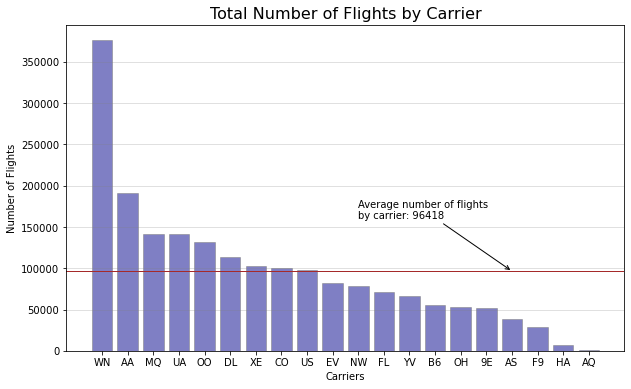

In [8]:
values1 = df["UniqueCarrier"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(values1.index, values1,
       color = "darkblue",
       edgecolor="grey",
       alpha = 0.5)

ax.axhline(values1.mean(),
           color='brown',
           linestyle='-',
           linewidth= 1)

ax.annotate('Average number of flights\nby carrier: ' + str(int(values1.mean())),
            xy=(16,values1.mean()),
            xytext=(10,160000),
            arrowprops=dict(arrowstyle='->'))

ax.set(xlabel = "Carriers", 
       ylabel = "Number of Flights")

ax.set_title("Total Number of Flights by Carrier", size=16)

ax.grid(axis="y", color="grey", alpha=0.3)
plt.show()

### 1.2. Visualització de la variable numérica ArrDelay

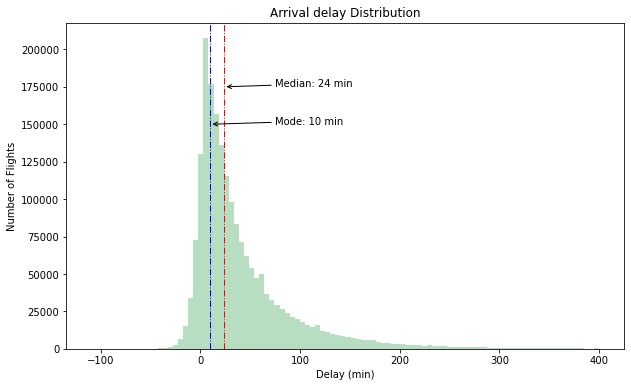

In [9]:
# Mask to remove outliers
mask = df["ArrDelay"] <= 400
values2 = df["ArrDelay"][mask]

# Median and mode of ArrDelay
median = values2.median()
mode = values2.mode()[0]

fig, ax = plt.subplots(figsize=(10, 6))
n_bins = int(500/5)

ax.hist(values2,
        bins = n_bins,
        color = "#88c999",
        alpha=0.6)

ax.set(xlabel = "Delay (min)",
       ylabel = "Number of Flights",
       title = "Arrival delay Distribution")

# Annotate median
ax.axvline(median, color='red', linestyle='-.', linewidth= 1)
ax.annotate('Median: ' + str(int(median)) + " min",
             xy = (median, 175000),
             xytext = (75, 175000),
             arrowprops=dict(arrowstyle='->'))

# Annotate mode
ax.axvline(mode, color='blue', linestyle='-.', linewidth= 1)
ax.annotate('Mode: ' + str(int(mode)) + " min",
             xy = (mode, 150000),
             xytext = (75, 150000),
             arrowprops=dict(arrowstyle='->'))            

plt.show()

### 1.3. Visualització de la variable numérica ArrDelay i la variable categórica UniqueCarrier

In [10]:
values3 = df[["UniqueCarrier", "ArrDelay"]]
values3 = values3.groupby("UniqueCarrier").mean()
values3.sort_values(by="ArrDelay", ascending=True, inplace=True)
values3 = values3.T

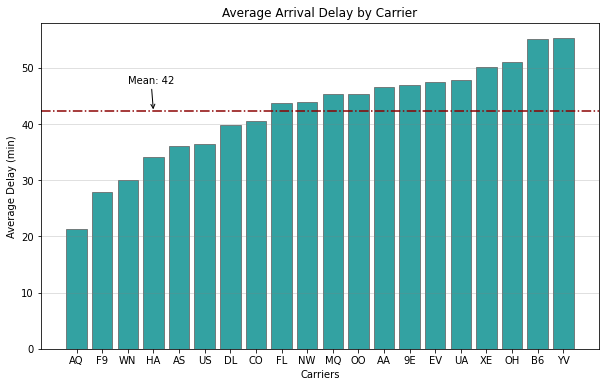

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(values3.columns, 
       values3.loc["ArrDelay"],
       color="darkcyan",
       edgecolor="dimgrey",
       alpha=0.8)

ax.set(xlabel = "Carriers",
       ylabel = "Average Delay (min)",
       title = "Average Arrival Delay by Carrier")

ax.grid(axis="y", color="grey", alpha=0.3)

ax.axhline(values3.loc["ArrDelay"].mean(),
           color="darkred", 
           linestyle="-.",)

ax.annotate('Mean: ' + str(int(values3.loc["ArrDelay"].mean())),
             xy = (values3.columns.get_loc("HA"), values3.loc["ArrDelay"].mean()),
             xytext = (values3.columns.get_loc("WN"), values3.loc["ArrDelay"].mean()+5),
             arrowprops=dict(arrowstyle='->'))

plt.show()

### 1.4. Visualització de les variables numériques ArrDelay i DepDelay

In [12]:
values4 = df[["ArrDelay", "DepDelay"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x=values4.ArrDelay, y=values4.DepDelay,
           color="darkorange",
           edgecolor="white",
           alpha=0.8)

plt.show()